In [1]:
import pandas as pd
import os

In [2]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)

In [3]:
all_data = pd.read_csv("all_data_copy.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Cleaning the data

In [4]:
all_data[90:100]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
90,176643,Macbook Pro Laptop,1,1700,04/27/19 21:32,"373 Adams St, Boston, MA 02215"
91,176644,USB-C Charging Cable,1,11.95,04/23/19 02:09,"962 7th St, Los Angeles, CA 90001"
92,176645,AAA Batteries (4-pack),3,2.99,04/26/19 18:38,"514 Lake St, Dallas, TX 75001"
93,176646,Macbook Pro Laptop,1,1700,04/22/19 07:14,"657 Adams St, Portland, OR 97035"
94,176647,Google Phone,1,600,04/21/19 19:40,"273 South St, Los Angeles, CA 90001"
95,176648,27in FHD Monitor,1,149.99,04/24/19 01:17,"732 2nd St, Portland, OR 97035"
96,176649,USB-C Charging Cable,1,11.95,04/09/19 08:49,"702 11th St, San Francisco, CA 94016"
97,176650,Lightning Charging Cable,1,14.95,04/12/19 16:47,"153 River St, Boston, MA 02215"
98,176651,iPhone,1,700,04/07/19 13:14,"997 South St, Boston, MA 02215"
99,176652,LG Washing Machine,1,600.0,04/09/19 20:04,"502 14th St, New York City, NY 10001"


In [5]:
# Dropping nan values
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
all_data = all_data.dropna(how = 'all')

In [7]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Augment data with additional columns


## Task 2: Adding month colummn

#### Find 'Or' and delete it

In [8]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [10]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


## Task 3: Add a sales column

In [11]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #make int 
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [12]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## Task 4 : Add a city column

In [13]:
# using .apply method
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
    

all_data['City'] = all_data['Purchase Address'].apply(lambda x:f"{get_city(x)} ({get_state(x)})")
#all_data.drop(columns = 'Column',inplace = True)

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


## Q1: What was the best month for sales?How much was earned that month?

In [14]:
results = all_data.groupby('Month').sum()
results.head()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75


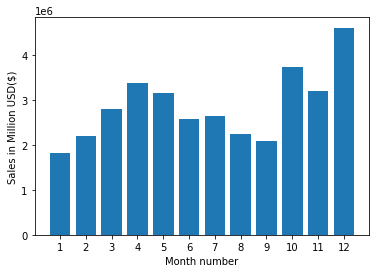

In [15]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in Million USD($)')
plt.xlabel('Month number')
plt.show()

## Q2 : What city has the highest number of sales?


In [16]:
results2 = all_data.groupby('City').sum()
results2

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


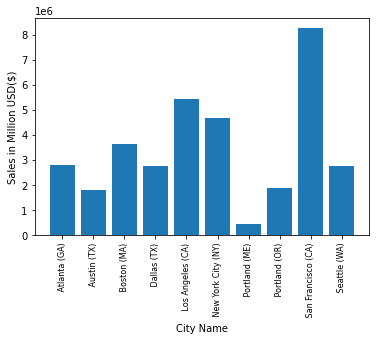

In [17]:
cities = [city for city , df in all_data.groupby('City')]

plt.bar(cities,results2['Sales'])
plt.xticks(cities,rotation = 'vertical',size = 8)
plt.ylabel('Sales in Million USD($)')
plt.xlabel('City Name')
plt.show()

### Q3 : What products are most often sold together?


In [18]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID','Grouped']].drop_duplicates()

df.head()

<ipython-input-18-c60816879de6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [19]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print(key,value)
    


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Q4 : What product sold the most?Why do you think it sold the most?

In [20]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


Text(0, 0.5, '# Ordered')

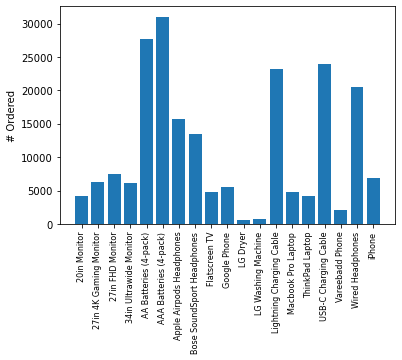

In [21]:
product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product,df in product_group]

plt.bar(products,quantity_ordered)
plt.xticks(products,rotation = 'vertical',size = 8)
plt.ylabel('# Ordered')

[Text(0, 0, '20in Monitor'),
 Text(0, 0, '27in 4K Gaming Monitor'),
 Text(0, 0, '27in FHD Monitor'),
 Text(0, 0, '34in Ultrawide Monitor'),
 Text(0, 0, 'AA Batteries (4-pack)'),
 Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(0, 0, 'Apple Airpods Headphones'),
 Text(0, 0, 'Bose SoundSport Headphones'),
 Text(0, 0, 'Flatscreen TV'),
 Text(0, 0, 'Google Phone'),
 Text(0, 0, 'LG Dryer'),
 Text(0, 0, 'LG Washing Machine'),
 Text(0, 0, 'Lightning Charging Cable'),
 Text(0, 0, 'Macbook Pro Laptop'),
 Text(0, 0, 'ThinkPad Laptop'),
 Text(0, 0, 'USB-C Charging Cable'),
 Text(0, 0, 'Vareebadd Phone'),
 Text(0, 0, 'Wired Headphones'),
 Text(0, 0, 'iPhone')]

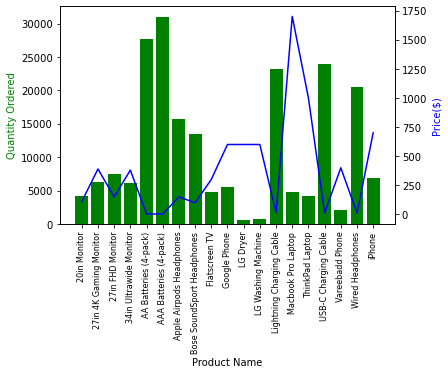

In [22]:
prices = all_data.groupby('Product').mean()['Price Each']

fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered,color ='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color = 'g')
ax2.set_ylabel('Price($)',color = 'b')
ax1.set_xticklabels(products,rotation = 'vertical',size =8)

AAA batteries is the product which is sold the most due to it's price
